# Bussiness Case -: To identify the employeesmost likely to get promoted

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st

## Loading the Data

In [464]:
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\HR Analytics\train_LZdllcl.csv')

## Basic Checks

In [224]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [226]:
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [227]:
data.shape

(54808, 14)

In [228]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [229]:
## Removing the unique column :-

data.drop(['employee_id'], axis=1, inplace=True)

In [230]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Exploratory Data Analysis

In [231]:
## Bi-Variant Analysis

# Numerical Analysis

data.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [232]:
data.describe(include='O')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [233]:
data.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [234]:
data.median()

no_of_trainings          1.0
age                     33.0
previous_year_rating     3.0
length_of_service        5.0
KPIs_met >80%            0.0
awards_won?              0.0
avg_training_score      60.0
is_promoted              0.0
dtype: float64

In [235]:
data.std()

no_of_trainings          0.609264
age                      7.660169
previous_year_rating     1.259993
length_of_service        4.265094
KPIs_met >80%            0.477590
awards_won?              0.150450
avg_training_score      13.371559
is_promoted              0.279137
dtype: float64

In [236]:
data.var()

no_of_trainings           0.371203
age                      58.678192
previous_year_rating      1.587581
length_of_service        18.191028
KPIs_met >80%             0.228093
awards_won?               0.022635
avg_training_score      178.798603
is_promoted               0.077918
dtype: float64

In [237]:
data.head(3)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [238]:
data['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

In [239]:
data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [240]:
data.head(3)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


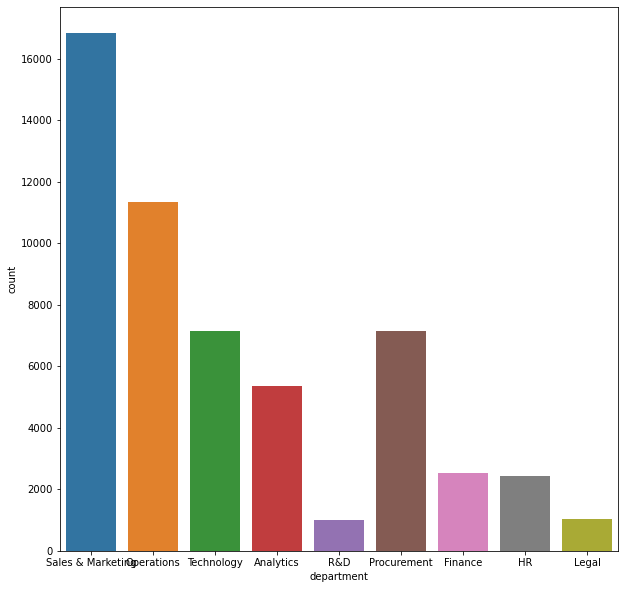

In [241]:
plt.figure(figsize=(10,10))
sns.countplot(x='department', data=data)
plt.show()

In [242]:
data.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

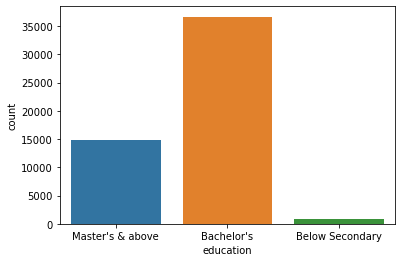

In [243]:
sns.countplot(x='education', data=data)

<AxesSubplot:xlabel='education', ylabel='is_promoted'>

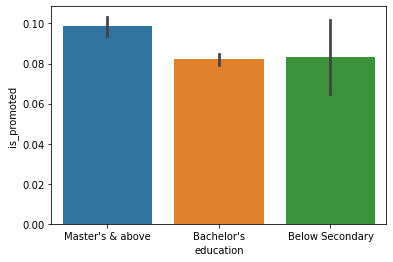

In [244]:
sns.barplot(x='education', y='is_promoted',data=data)

<AxesSubplot:xlabel='education', ylabel='count'>

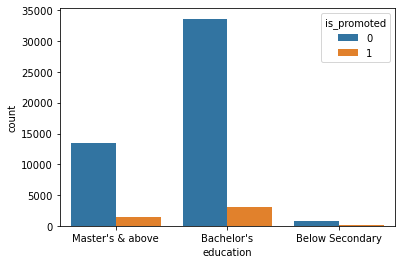

In [245]:
sns.countplot(x='education', data=data, hue='is_promoted')

In [246]:
data.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

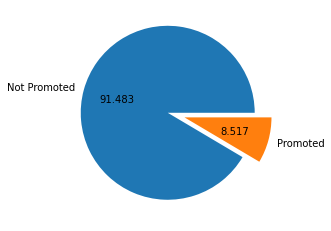

In [247]:
promoted = [4668, 50140]
labels = ['Not Promoted','Promoted']
explode = [0.1,0.1]
plt.pie(data['is_promoted'].value_counts(), labels=labels, explode=explode,autopct='%.3f')
plt.show()

In [248]:
data['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [249]:
data['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

## Data Pre-processing

In [250]:
## Handling missing value

data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [251]:
data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [252]:
data['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [253]:
data['education'].nunique()

3

In [254]:
data['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [255]:
data['education'].mode()

0    Bachelor's
dtype: object

In [256]:
from sklearn.impute import SimpleImputer

In [257]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [258]:
imputer.fit(data[['education']])

SimpleImputer(strategy='most_frequent')

In [259]:
data['education'] = imputer.transform(data[['education']])

In [260]:
data.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [262]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [263]:
data['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [264]:
data['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [265]:
data['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [266]:
data['previous_year_rating'].nunique()

5

In [267]:
data['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [268]:
print(data['previous_year_rating'].median())
print(data['previous_year_rating'].mean())

3.0
3.329255780917055


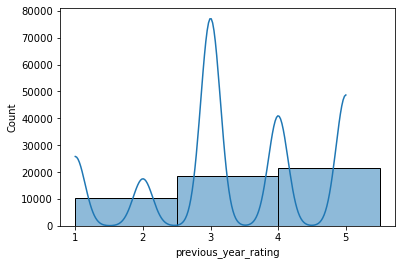

In [269]:
sns.histplot(x='previous_year_rating', data=data, kde=True, binwidth=1.5)
plt.show()

In [270]:
data.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [271]:
from sklearn.impute import SimpleImputer

In [272]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')

In [273]:
imputer.fit(data[['previous_year_rating']])

SimpleImputer(strategy='median')

In [274]:
data['previous_year_rating'] = imputer.transform(data[['previous_year_rating']])

In [275]:
data.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [276]:
data['previous_year_rating'].value_counts()

3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [277]:
data_cat = data.select_dtypes(object)

In [278]:
data_num =  data.select_dtypes(['int64', 'float64'])

In [279]:
data_cat.head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [280]:
data_cat['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [281]:
pd.get_dummies(data_cat['gender'])

,f,m
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
54803,0,1
54804,1,0
54805,0,1
54806,0,1


In [282]:
pd.get_dummies(data['region'])

,region_1,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54805,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [283]:
## Label Encoding


In [284]:
from sklearn.preprocessing import LabelEncoder

In [285]:
le = LabelEncoder()

In [286]:
le.fit_transform(data['region'])

array([31, 14, 10, ...,  0, 33, 14])

In [287]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [288]:
for col in data_cat:
    le = LabelEncoder()
    data_cat[col] = le.fit_transform(data_cat[col])

In [289]:
data_cat

,department,region,education,gender,recruitment_channel
0,7,31,2,0,2
1,4,14,0,1,0
2,7,10,0,1,2
3,7,15,0,1,0
4,8,18,0,1,0
...,...,...,...,...,...
54803,8,5,0,1,2
54804,4,19,2,0,0
54805,0,0,0,1,0
54806,7,33,0,1,2


In [290]:
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


In [291]:
## Outlier - 3 Standard Deviation rule

data.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [302]:
for col in data:
    if data[col].dtypes == 'int64':
        print(col)

no_of_trainings
age
length_of_service
KPIs_met >80%
awards_won?
avg_training_score
is_promoted


In [303]:
box = data[['no_of_trainings','age','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']]

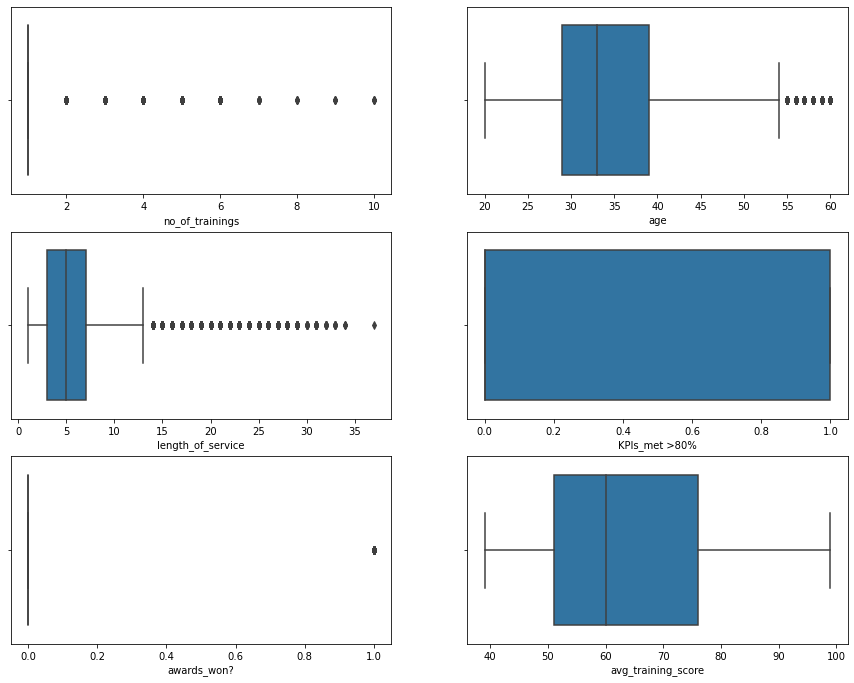

In [308]:
plt.figure(figsize=(15,20))
counter=1

for columns in box:
    if counter <= 10:
        ax=plt.subplot(5,2,counter)
        sns.boxplot(x=data[columns], data=data)
        
    counter += 1

In [316]:
lower_limit = data.no_of_trainings.mean() - 3*data.no_of_trainings.std()
lower_limit

-0.5747815435312571

In [323]:
upper_limit = data.no_of_trainings.mean() + 3*data.no_of_trainings.std()
upper_limit

3.080802562360625

In [336]:
len(data.loc[data['no_of_trainings'] > upper_limit])

667

In [338]:
(667/data.shape[0])*100

1.2169756239964968

In [340]:
data.loc[data['no_of_trainings'] > upper_limit, 'no_of_trainings'] = data['no_of_trainings'].median()

In [343]:
lower_limit_age = data['age'].mean() - 3*data['age'].std()

In [344]:
upper_limit_age = data['age'].mean() + 3*data['age'].std()

In [345]:
lower_limit_age

11.82340788203259

In [346]:
upper_limit_age

57.784423091547914

In [351]:
len(data.loc[data['age'] > upper_limit_age])

639

In [352]:
(639/data.shape[0])*100

1.1658881915048898

In [354]:
len(data.loc[data['age'] < lower_limit_age])

0

In [356]:
data.duplicated().sum()

175

In [366]:
data.drop_duplicates()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


In [367]:
from sklearn.preprocessing import LabelEncoder

In [368]:
lc = LabelEncoder()

In [382]:
for col in data:
    if data[col].dtypes == object:
        lc = LabelEncoder()
        data[col] = le.fit_transform(data[col])

In [383]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [389]:
X = data.drop('is_promoted', axis=1)

In [386]:
y = data.is_promoted

In [391]:
from sklearn.model_selection import train_test_split

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [394]:
## Scaling

from sklearn.preprocessing import MinMaxScaler

In [401]:
scaler = MinMaxScaler()

In [396]:
data.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0


In [397]:
data['recruitment_channel'].value_counts()

0    30446
2    23220
1     1142
Name: recruitment_channel, dtype: int64

In [399]:
data['avg_training_score'].value_counts()

50    2716
49    2681
48    2437
51    2347
60    2155
      ... 
98      37
99      35
41      26
40       5
39       2
Name: avg_training_score, Length: 61, dtype: int64

In [402]:
data[['department', 'region', 'education', 'no_of_trainings', 'previous_year_rating', 
      'length_of_service', 'avg_training_score']] = scaler.fit_transform(data[['department', 'region', 'education', 'no_of_trainings', 'previous_year_rating', 
      'length_of_service', 'avg_training_score']])

In [403]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.875,0.939394,1.0,0,2,0.0,35,1.0,0.194444,1,0,0.166667,0
1,0.500,0.424242,0.0,1,0,0.0,30,1.0,0.083333,0,0,0.350000,0
2,0.875,0.303030,0.0,1,2,0.0,34,0.5,0.166667,0,0,0.183333,0
3,0.875,0.454545,0.0,1,0,0.5,39,0.0,0.250000,0,0,0.183333,0
4,1.000,0.545455,0.0,1,0,0.0,45,0.5,0.027778,0,0,0.566667,0


In [404]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [405]:
from imblearn.over_sampling import SMOTE

In [406]:
smote = SMOTE()

In [407]:
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [410]:
from collections import Counter

In [411]:
print('Actual Classes', Counter(y_train))
print('Actual Classes', Counter(y_smote))      

Actual Classes Counter({0: 40128, 1: 3718})
Actual Classes Counter({0: 40128, 1: 40128})


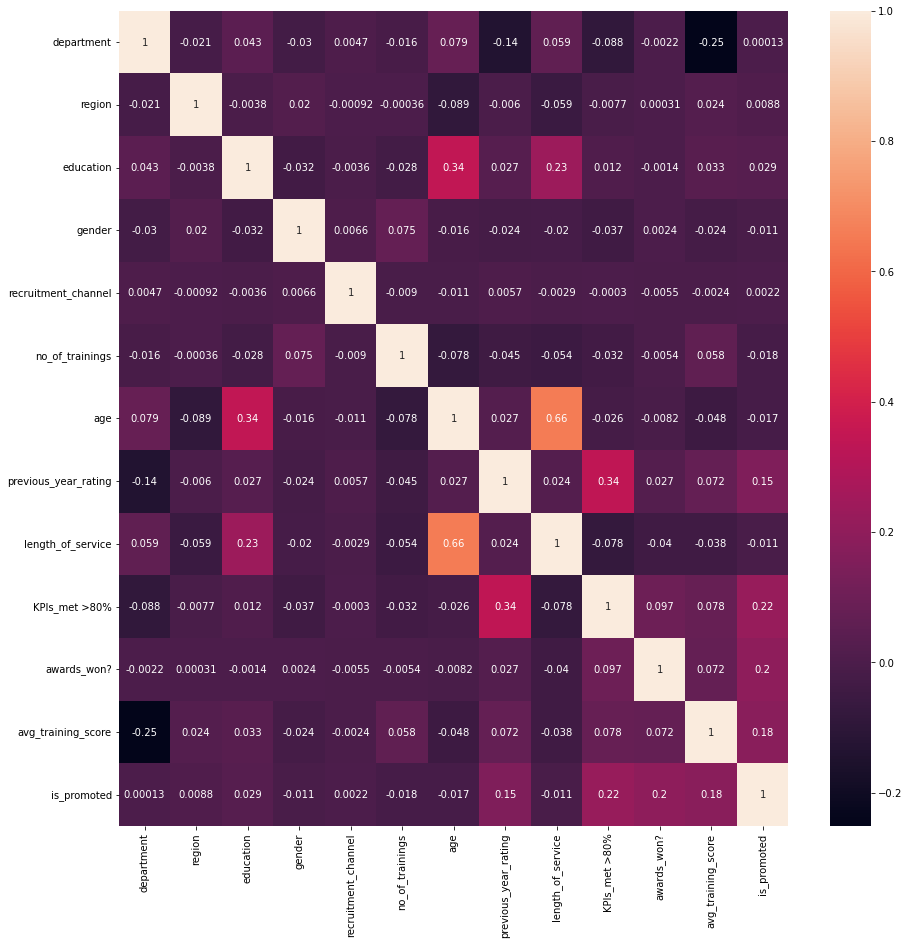

In [416]:
## Feature Selection
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [417]:
## Model & Evaluation

from sklearn.linear_model import LogisticRegression

In [419]:
lr = LogisticRegression()

In [420]:
lr.fit(X_train, y_train)

LogisticRegression()

In [421]:
y_pred = lr.predict(X_test)

In [424]:
from sklearn.metrics import r2_score

In [426]:
r2_score(y_test, y_pred)

-0.11102130075488392

In [427]:
lr1 = LogisticRegression() 

In [428]:
lr1.fit(X_smote,y_smote)

LogisticRegression()

In [429]:
y_pred1 = lr1.predict(X_test)

In [430]:
r2_score(y_test,y_pred1)

-2.9876905608007243

In [432]:
from sklearn.neighbors import KNeighborsClassifier

In [434]:
knn = KNeighborsClassifier()

In [435]:
knn.fit(X_smote,y_smote)

KNeighborsClassifier()

In [436]:
y_pred_knn = knn.predict(X_test)

In [444]:
r2_score(y_test, y_pred_knn)

-1.8951094476102366

In [438]:
knn1 = KNeighborsClassifier()

In [439]:
knn1.fit(X_train,y_train)

KNeighborsClassifier()

In [440]:
y_pred_knn1 = knn1.predict(X_test)

In [441]:
r2_score(y_test, y_pred_knn1)

0.021517547364215406

In [442]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [445]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [446]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10012
           1       0.42      0.46      0.44       950

    accuracy                           0.90     10962
   macro avg       0.69      0.70      0.69     10962
weighted avg       0.90      0.90      0.90     10962



In [447]:
r2_score(y_test, y_pred_dt)

-0.27813550055722636

In [448]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [449]:
y_predict=rf_clf.predict(X_test)

In [450]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10012
           1       0.81      0.29      0.43       950

    accuracy                           0.93     10962
   macro avg       0.87      0.64      0.70     10962
weighted avg       0.93      0.93      0.92     10962



In [451]:
r2_score(y_test, y_predict)

0.1494463485922155

In [452]:
from sklearn.ensemble import BaggingClassifier#import bagging
KNN2=KNeighborsClassifier() # Model not seen any training data
model_bagg1=BaggingClassifier(base_estimator=KNN2,n_estimators=30) ## model objet creation
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
model_bagg1.fit(X_train,y_train) ## fitting the model
y_hat_bagg=model_bagg1.predict(X_test) ## getting the prediction

In [453]:
r2_score(y_test, y_hat_bagg)

0.03650019976028751

In [454]:
print(classification_report(y_test,y_hat_bagg))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10012
           1       0.78      0.17      0.27       950

    accuracy                           0.92     10962
   macro avg       0.85      0.58      0.62     10962
weighted avg       0.91      0.92      0.90     10962



In [455]:
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price

In [456]:
r2_score(y_test, y_hat)

0.23934226296864802

In [458]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10012
           1       0.85      0.37      0.51       950

    accuracy                           0.94     10962
   macro avg       0.90      0.68      0.74     10962
weighted avg       0.94      0.94      0.93     10962



In [460]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2) ## model object creation max_iter=Stopping parameter
model.fit(X_train,y_train) ## training the data
y_predict_proba = model.predict_proba(X_test) ## predicting the pro
## Probability of class
y_predict6 = model.predict(X_test)

In [461]:
r2_score(y_test, y_predict6)

-0.09488613663603696

In [462]:
print(classification_report(y_test,y_predict6))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10012
           1       0.00      0.00      0.00       950

    accuracy                           0.91     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.83      0.91      0.87     10962



In [465]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


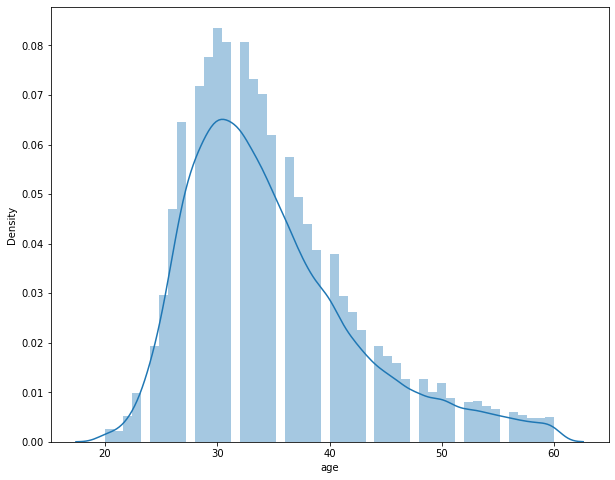

In [472]:
plt.figure(figsize=(10,8))
sns.distplot(data['age'])
plt.show()

In [473]:
tdata = boxcox(data[0])

NameError: name 'boxcox' is not defined